In [ ]:
'''
Name: Peter Sunny Shanthveer Markappa
Student Number: R00208303
Assignment: Deep Learning Assignment 02
Draft : final
Date of submission : 01-May-2022
'''

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip "/content/gdrive/My Drive/Deep_learning_02/earth_data.zip" -d "./"

Archive:  /content/gdrive/My Drive/Deep_learning_02/earth_data.zip
  inflating: ./earth_data.h5         


In [3]:
!ls

earth_data.h5  gdrive  sample_data


In [60]:
import warnings

import numpy as np
import h5py

import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import imagenet_utils


from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [5]:
# function to Loading the Data from Drive
def loadDataH5(): 
  with h5py.File('earth_data.h5','r') as hf:
    trainX = np.array(hf.get('trainX'))
    trainY = np.array(hf.get('trainY'))
    valX = np.array(hf.get('valX'))
    valY = np.array(hf.get('valY'))
    print (trainX.shape,trainY.shape)
    print (valX.shape,valY.shape)

    return trainX, trainY, valX, valY

trainX, trainY, valX, valY = loadDataH5()

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)


In [6]:
trainX = trainX.astype('float32')/255.0
# trainY = trainY.astype('float32')/255.0

valX = valX.astype('float32')/255.0
# valY = valY.astype('float32')/255.0

In [10]:
print(trainX.shape[1:])

(64, 64, 3)


In [21]:
# input shape
input_shape = trainX.shape[1:]

In [35]:
# 
VGG_16_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling=None,
    classes=9)

VGG_16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [36]:
featuresTrain= VGG_16_model.predict(trainX)
featuresTrain= featuresTrain.reshape(featuresTrain.shape[0], -1)
print("feature Training shape", featuresTrain.shape)

featuresVal= VGG_16_model.predict(valX)
featuresVal= featuresVal.reshape(featuresVal.shape[0], -1)
print("features validation", featuresVal.shape)

feature Training shape (19200, 2048)
features validation (4800, 2048)


**Random_Forest Classifier**

In [37]:
randon_forest_model = RandomForestClassifier(300)
randon_forest_model.fit(featuresTrain, trainY)

RandomForestClassifier(n_estimators=300)

In [38]:
results_randon_forest_model = randon_forest_model.predict(featuresVal)
print (accuracy_score(results_randon_forest_model, valY))

0.8189583333333333


**printing the identified images correctly and confusion matrix to evaluate it**

In [39]:
print("Correctly identified images is ", accuracy_score(results_randon_forest_model, valY, normalize=False))
print("\n", "Confusion matrix \n", confusion_matrix(valY, results_randon_forest_model, labels = range(0,9)))

Correctly identified images is  3931

 Confusion matrix 
 [[529   2   2  20   0  22  11   1  13]
 [  1 565   9   0   0  22   0   1   2]
 [  2  15 501  14   0  19  21  17  11]
 [ 38   0  12 318  19   4  36  12  61]
 [  8   0   2   1 456   0  15  15   3]
 [ 11  24  15   4   0 319  11   3  13]
 [ 19   1  42  24  26  12 345  15  16]
 [  0   0  15   3  12   1  10 558   1]
 [ 28   1  11  52   6  45  10   7 340]]


We can see that random forest has identified 3931 correctly

**implementation of logistic regression**

In [40]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(featuresTrain, trainY)

LogisticRegression()

In [43]:
results_logistic_regression_model = logistic_regression_model.predict(featuresVal)
print (accuracy_score(results_logistic_regression_model, valY))

0.8591666666666666


In [44]:
print("Correctly identified images is ", accuracy_score(results_logistic_regression_model, valY, normalize=False))
print("\n", "Confusion matrix \n", confusion_matrix(valY, results_logistic_regression_model, labels = range(0,9)))

Correctly identified images is  4124

 Confusion matrix 
 [[524   6   1  19   0  12  18   1  19]
 [  0 573   6   0   0  18   0   1   2]
 [  1  43 512  11   1   5  17   7   3]
 [ 14   1   9 394   2   6  20   5  49]
 [  4   0   1  12 445   0  21  13   4]
 [  7  42   4   3   0 323   7   0  14]
 [ 11   2  40  16   8   5 405   6   7]
 [  0   4   9   2   8   1  10 565   1]
 [ 18   3   8  47   3  29   9   0 383]]


We can see that logistic_regression_model has identified 4121 correctly

Implementation of Linear SVC

In [45]:
linear_SVC_model = LinearSVC()
linear_SVC_model.fit(featuresTrain, trainY)

LinearSVC()

In [46]:
results_linear_SVC_model = linear_SVC_model.predict(featuresVal)
print (accuracy_score(results_linear_SVC_model, valY))

0.856875


In [47]:
print("Correctly identified images is ", accuracy_score(results_linear_SVC_model, valY, normalize=False))
print("\n", "Confusion matrix \n", confusion_matrix(valY, results_linear_SVC_model, labels = range(0,9)))

Correctly identified images is  4113

 Confusion matrix 
 [[506   3   0  17   2  13  38   1  20]
 [  1 580   6   0   0   8   1   1   3]
 [  1   9 514  10   1   8  45   6   6]
 [ 14   0   7 363   4   3  48   8  53]
 [  3   1   1   7 447   0  21  19   1]
 [  8  16   4   4   0 339  16   0  13]
 [ 11   1  26  18  14   0 420   3   7]
 [  0   0   9   0   7   0  13 571   0]
 [ 13   7   8  55   2  19  20   3 373]]


We can see that results_linear_SVC_model has identified 4113 correctly

Let me run different classifiers by storing all them in dictionary

In [53]:
different_classifiers = {
    "Logistic_Regression" : LogisticRegression(solver = "lbfgs"),
    "KNearestNeighbours" : KNeighborsClassifier(n_neighbors=2),
    "Decision_Tress_Classifier" : DecisionTreeClassifier(min_samples_split=2),
    "Random_Forest_Classifier" : RandomForestClassifier(n_estimators=1000),
    "XG_Booster": XGBClassifier(),
    "Gradient_Boosted_Classifier":GradientBoostingClassifier()
}


for k, c in different_classifiers.items():
  c.fit(featuresTrain, trainY)

  y_prediction = c.predict(featuresVal)

  Training_score = cross_val_score(c, featuresTrain, trainY, cv=5)

  print("****************************************************************************************************************")
  print("Classifier = ", c.__class__.__name__, "Accuracy_score :", "-----")
  print("********************** Performance of the Test ***********************")
  print('Accuracy_Score = {:.3f} \n'.format(accuracy_score(valY, y_prediction) ))

  print("Total correctly identified images by the particular model", accuracy_score(y_prediction, valY, normalize=False),"--\n")
  print("Confusion matrix of model is : \n", confusion_matrix(valY, y_prediction, labels=range(0,9)))

  print("****************************************************************************************************************")


****************************************************************************************************************
Classifier =  LogisticRegression Accuracy_score : -----
********************** Performance of the Test ***********************
Accuracy_Score = 0.859 

Total correctly identified images by the particular model 4124 --

Confusion matrix of model is : 
 [[524   6   1  19   0  12  18   1  19]
 [  0 573   6   0   0  18   0   1   2]
 [  1  43 512  11   1   5  17   7   3]
 [ 14   1   9 394   2   6  20   5  49]
 [  4   0   1  12 445   0  21  13   4]
 [  7  42   4   3   0 323   7   0  14]
 [ 11   2  40  16   8   5 405   6   7]
 [  0   4   9   2   8   1  10 565   1]
 [ 18   3   8  47   3  29   9   0 383]]
****************************************************************************************************************
****************************************************************************************************************
Classifier =  KNeighborsClassifier Accuracy_score : -----

KeyboardInterrupt: ignored

reference for this section
https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
bold text

**Part 2 : we will add the new layers by freezing all other layers**

In [61]:
def plot_history(history, name_model):
  plt.style.use('ggplot')
  plt.figure()
  plt.plot(np.arange(0, epochs), history.history['loss'], label='Training Loss')
  plt.plot(np.arange(0, epochs), history.history['val_loss'], label='Validation Loss')
  plt.plot(np.arange(0, epochs), history.history['accuracy'], label='Training Accuracy')
  plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='Validation Accuracy')

  plt.title("Training / Valiation ==> Loss and Accuracy" + "\n" + name_model)

  plt.xlabel("Epochs --> ")
  plt.ylabel("Loss / Accuracy")

  plt.legend()

  plt.savefig("Loss_Accuracy_Graph"+".png")

In [62]:
value = False
VGG_16_model.trainable = value

# base_learner_4 = Sequential()
model = Sequential()
model.add(VGG_16_model)
model.add(Flatten())

model.add(Dense(512, activation = 'relu') )
model.add(Dropout(0.2))

model.add(Dense(256, activation = 'relu') )
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu') )
model.add(Dropout(0.2))

model.add(Dense(9, activation = 'softmax') )

# summary of the model
VGG_16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [63]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable ) for layer in VGG_16_model.layers]
pd.DataFrame(layers, columns = ['Type of the Layer', 'Name of Layer', 'Trainable Layer'])

,Type of the Layer,Name of Layer,Trainable Layer
0,<keras.engine.input_layer.InputLayer object at...,input_10,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [64]:
epochs = 20
model.compile(optimizer = Adam(learning_rate= 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x = trainX, y = trainY, batch_size = 32, epochs = epochs, validation_data = (valX, valY))


Epoch 1/20
600/600 [==============================] - 29s 47ms/step - loss: 1.1768 - accuracy: 0.6066 - val_loss: 0.8431 - val_accuracy: 0.7133
Epoch 2/20
600/600 [==============================] - 28s 47ms/step - loss: 0.9190 - accuracy: 0.7022 - val_loss: 0.7555 - val_accuracy: 0.7723
Epoch 3/20
600/600 [==============================] - 28s 46ms/step - loss: 0.8785 - accuracy: 0.7171 - val_loss: 0.7689 - val_accuracy: 0.7579
Epoch 4/20
600/600 [==============================] - 28s 46ms/step - loss: 0.8612 - accuracy: 0.7239 - val_loss: 0.6436 - val_accuracy: 0.8169
Epoch 5/20
600/600 [==============================] - 28s 46ms/step - loss: 0.8129 - accuracy: 0.7405 - val_loss: 0.6770 - val_accuracy: 0.7960
Epoch 6/20
600/600 [==============================] - 28s 46ms/step - loss: 0.8678 - accuracy: 0.7228 - val_loss: 0.7822 - val_accuracy: 0.7421
Epoch 7/20
600/600 [==============================] - 28s 46ms/step - loss: 0.9223 - accuracy: 0.7094 - val_loss: 0.6787 - val_accuracy:

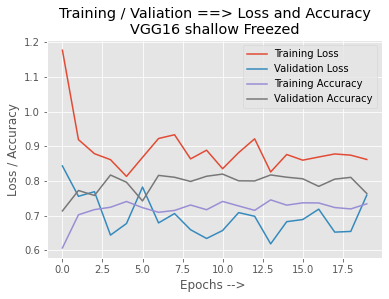

In [65]:
epochs = 20
model_n = "VGG16 shallow Freezed"

plot_history(history, name_model = model_n)

 fine tuning as a method of transfer l

In [68]:
# Freezing block 4 conv 1 layer

value = False
VGG_16_model.trainable =not(value)
trainable = value
for layer in VGG_16_model.layers:
  if layer.name in ['block4_conv1']:
    trainable = True
  if trainable:
    layer.trainable = True
  else:
    layer.trainable = value
  # layer.trainable = True if trainable else layer.trainable = value


VGG_16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [69]:
layers = [(layer, layer.name, layer.trainable ) for layer in VGG_16_model.layers]
pd.DataFrame(layers, columns = ['Type of the Layer', 'Name of Layer', 'Trainable Layer'])

,Type of the Layer,Name of Layer,Trainable Layer
0,<keras.engine.input_layer.InputLayer object at...,input_10,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [70]:
value = False
VGG_16_model.trainable = value

# base_learner_4 = Sequential()
model = Sequential()
model.add(VGG_16_model)
model.add(Flatten())

model.add(Dense(512, activation = 'relu') )
model.add(Dropout(0.2))

model.add(Dense(256, activation = 'relu') )
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu') )
model.add(Dropout(0.2))

model.add(Dense(9, activation = 'softmax') )

# summary of the model
VGG_16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [71]:
epochs = 20
model.compile(optimizer = Adam(learning_rate= 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x = trainX, y = trainY, batch_size = 32, epochs = epochs, validation_data = (valX, valY))


Epoch 1/20
600/600 [==============================] - 34s 56ms/step - loss: 1.1447 - accuracy: 0.6162 - val_loss: 0.8022 - val_accuracy: 0.7621
Epoch 2/20
600/600 [==============================] - 28s 47ms/step - loss: 1.0140 - accuracy: 0.6665 - val_loss: 0.6789 - val_accuracy: 0.7969
Epoch 3/20
600/600 [==============================] - 28s 46ms/step - loss: 0.9192 - accuracy: 0.7053 - val_loss: 0.7971 - val_accuracy: 0.7498
Epoch 4/20
600/600 [==============================] - 28s 47ms/step - loss: 0.8997 - accuracy: 0.7064 - val_loss: 0.6912 - val_accuracy: 0.7635
Epoch 5/20
600/600 [==============================] - 28s 46ms/step - loss: 0.9079 - accuracy: 0.7092 - val_loss: 0.6626 - val_accuracy: 0.8065
Epoch 6/20
600/600 [==============================] - 28s 46ms/step - loss: 0.8943 - accuracy: 0.7088 - val_loss: 0.6739 - val_accuracy: 0.8071
Epoch 7/20
600/600 [==============================] - 28s 46ms/step - loss: 0.8667 - accuracy: 0.7219 - val_loss: 0.7580 - val_accuracy:

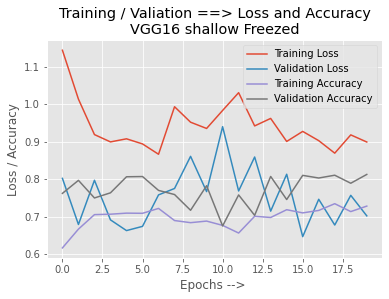

In [72]:
epochs = 20
model_n = "VGG16 shallow Freezed"

plot_history(history, name_model = model_n)

In [74]:
# Freezing block 5 conv 1 layer

value = False
VGG_16_model.trainable =not(value)
trainable = value
for layer in VGG_16_model.layers:
  if trainable:
    layer.trainable = True
  else:
    layer.trainable = value
  # layer.trainable = not(value) if trainable else layer.trainable = value


VGG_16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# *********************************************************************************** END ****************************************************************************************************